In [18]:
import pandas as pd # Data manipulation
import numpy as np # Scientific Computation

from sklearn.preprocessing import StandardScaler # Data analysis
from sklearn import linear_model # Data analysis
from sklearn.linear_model import LinearRegression # Data analysis
import sklearn.metrics as sm # Data analysis
from sklearn.model_selection import train_test_split # Data analysis

import matplotlib.pyplot as plt
import seaborn as sns

import pickle # rick / For serialization and deserialization of data from/to file

In [19]:
df = pd.read_csv("data/student_scores.csv", sep = ',')

In [20]:
df.shape

(25, 2)

In [21]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [22]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Clean Data

In [24]:
# to check null values in data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

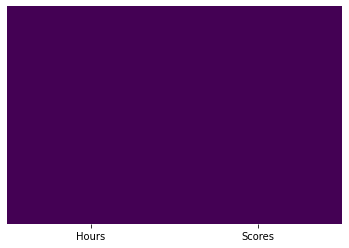

In [25]:
# same visualized
# makes sence if you have null values
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

In [26]:
corr_matrix = df.corr()
corr_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

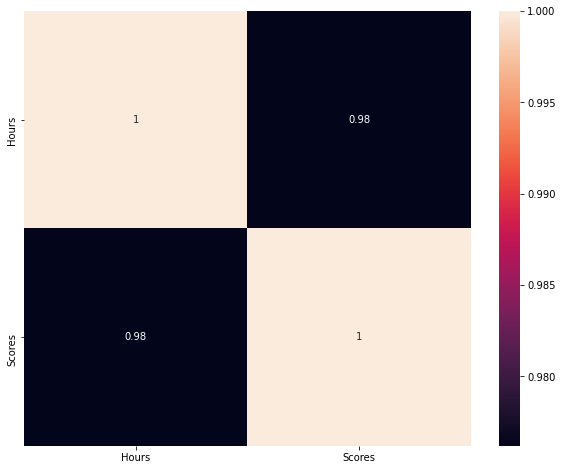

In [27]:
# plot the matrix as a heat map
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

# Train Model

#### Split data into independent X and Y

In [28]:
X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values.reshape(-1, 1)

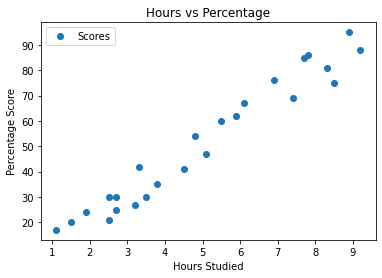

In [29]:
# plot all
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [30]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [31]:
# creating an instance of Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


# get the calculated coefficients
a = regressor.coef_
b = regressor.intercept_

In [32]:
a

array([9.91065648])

In [33]:
b

2.018160041434662

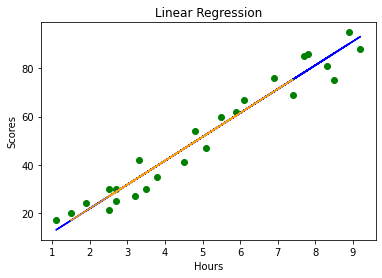

In [35]:
y_pred = regressor.predict(X_test)

# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_pred, color='orange')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [38]:
R2 = regressor.score(X, y)
R2

0.9526947647057273